# EXPLORATION_18. 문자를 읽을 수 있는 딥러닝

## 1. 들어가며
OCR(Optical Character Recognition, 광학 문자 인식)에 대해서 한 번씩은 들어보셨을 겁니다. 문자를 읽는 기술인 OCR은 산업적으로 매우 유용한 기술입니다. 딥러닝이 도입된 이후 OCR 기술이 획기적으로 개선되어 많은 산업 도메인에 유용하게 사용될 수 있는 가능성이 열리고 있습니다. 아래 링크의 글을 읽어 보면서 OCR 기술의 용도에 대해 생각해 봅시다

**OCR 기술 활용 사례**
- 우편번호 추출을 통한 우편물 관리
- 자동차 번호판 인식
- 모바일 기기를 사용한 명함 인식
- 신용카드 읽기를 이용한 결제 서비스
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템

### 준비물

In [ ]:
! mkdir -p ~/aiffel/ocr_python

## 2. 기계가 읽을 수 있나요?
사람이 문자를 읽으려면 어떤 과정을 거칠까요? 문자가 있다는 것을 1)인식하고, 인식한 문자를 2)해독하는 과정을 거치는 것이 일반적이다. 기계가 문자를 읽는 과정도 이와 다르지 않다. 컴퓨터 비전에서 사용하는 용어로 위의 두 단계를 번역하자면 문자의 존재를 1)Detection 하고, 어떤 문자인지 판독하는 2)Recognition 으로 나눌 수 있을 것이다.

그런데 정말 기계가 사진 속 글자를 잘 읽을 수 있을지 의심이 가진 않으시나요? 그래서 구글의 클라우드 기반 OCR API를 한번 테스트해 보도록 한다. 래 링크를 누르고 화면을 조금 내려가면 다음 화면을 만날 수 있다. 여기에 문자를 인식하려 하는 사진을 드래그 앤 드롭 해 본다. 손쉽게 딥러닝 기반의 최신 OCR을 테스트해볼 수 있다.(https://cloud.google.com/vision)

우리가 사용한 것은 구글 OCR API이다.  이 API를 이용하여 어플리케이션을 만들 수 있다. 파이썬 코드로 호출해서 다시 한번 테스트해본다.
다음과 같이 진행해 본다.

### STEP 1) 구글의 파이썬 API 인터페이스 모듈을 아래와 설치합니다.

In [1]:
! pip install --upgrade google-api-python-client
! pip install google-cloud-vision

     |████████████████████████████████| 7.5 MB 8.0 MB/s eta 0:00:01
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### STEP 2) Google Cloud Vision API 사용
아래 링크의 설명을 참고하여 서비스 계정 및 인증키를 생성한다. 브라우저에서 다운로드한 인증키는 my_google_api_key.json이라는 파일명으로 변경한다.  (파일은 프로젝트 이름으로 시작하는 파일명으로 자동 저장된다.) (https://kimchangheon.tistory.com/166)

cloud jupyter를 열고 my_google_api_key.json 파일을 ~/aiffel/ocr_python 디렉토리에 업로드해준다.

### STEP 3) API 사용 테스트
API를 활용하는 코드는 아래와 같다. 사용할 이미지를 cloud jupyter 를 이용하여 업로드 후 경로를 지정해준다.

In [15]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/표지판.jpg'  

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

total 16
-rw-r--r-- 1 root root 14928 Sep 21 07:18 Untitled.ipynb
Texts:

"신기교차로
천안 Cheonan
서운 Seoun
40 HSIC S.Anseong IC
|안성소방서
Anseong FireStn
|안성경찰서
AnseongPolice Stn
성환
Seonghwan
미양
Miyang
23
70 70
"

"신기"

"교차로"

"천안"

"Cheonan"

"서운"

"Seoun"

"40"

"HSIC"

"S.Anseong"

"IC"

"|"

"안성"

"소방서"

"Anseong"

"FireStn"

"|"

"안성"

"경찰서"

"AnseongPolice"

"Stn"

"성환"

"Seonghwan"

"미양"

"Miyang"

"23"

"70"

"70"
bounds: (351,287),(374,287),(374,316),(351,316)


## 3. 어떤 과정으로 읽을까요?
구글 API에서는 문자의 영역을 사각형으로 표현하고 우측에 Block과 Paragraph로 구분해서 인식 결과를 나타내고 있다. 구글 API가 이미지에 박스를 친 다음 박스별 텍스트의 내용을 알려준 것처럼, 문자 모델은 보통 두 단계로 이뤄진다.

1. 먼저 입력받은 사진 속에서 문자의 위치를 찾아낸다. (이 과정을 Text Detection(문자검출) 이라고 한다.)
2, 찾은 문자 영역으로부터 문자를 읽어내는 것은 Text Recognition(문자인식)이다.

예를 들어 아래 카카오의 OCR 모델은 먼저 문자가 있는 영역의 정보 (coord, Text Recognition)를 찾아내고, 각 영역에서 문자를 인식하고 있다. 이렇게 문자 인식 모델은 Text Detection과 Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 된다.
(Scene Text Detection with Polygon Offsetting and Border Augmentation논문)
위에 소개한 논문에서 언급된 문자의 영역을 표현하는 방법에는 어떤 것이 있나?
축에 정렬된 사각형인 Bounding box 그리고 돌아간 사각형 Oriented bounding box, 자유로운 사각형은 Quadrangle 그리고 다각형인 Polygon, Pixel 수준으로 영역을 표현한 Mask 등이 있다,

## 4. 딥러닝 문자인식의 시작
 딥러닝을 배우는 동안 MNIST 데이터셋을 여러 번 접하셨을 것이다. 주로 0부터 9까지의 손으로 쓰인 숫자가 있는 이미지를 이미지 분류 문제로 딥러닝을 이용하여 풀어보는 데이터셋으로 사용한다. MNIST가 딥러닝 데이터셋의 "hello, world!"라면, LeNet은 CNN의 "hello, world!"라 할 수 있다. 1998년에 발표된 LeNet은 우편번호나 손글씨를 읽기 위해서 만들어졌다. 앞서 학습한 MNIST로 LeNet을 훈련시킨다면 우편번호를 읽을 수 있는 것이다. (http://yann.lecun.com/exdb/lenet/stroke-width.html])


아래 데모 사이트에서 이렇게 간단한 구조로도 어려운 글자를 읽을 수 있는 딥러닝 분류 모델, LeNet을 확인해본다.
https://www.youtube.com/watch?v=m3BrTjo2zUA(영상참고)
http://yann.lecun.com/exdb/lenet/stroke-width.html

하지만 이렇게 단순한 분류 모델만으로는 우리가 위에서 구글 API로 테스트해 보았던 복잡한 결과를 얻을 수 없다. 넓고 복잡한 이미지에서 글자 영역을 찾을 수 없을뿐더러 글자를 영역별로 잘라서 넣더라도 우리가 인식하기를 원하는 사진은 여러 글자가 모여있기 때문에 단순한 분류 문제로 표현이 불가능하다.

## 5. 사진 속 문자 찾아내기 - detection
사진 속 문자를 찾아내는 최근의 딥러닝 모델은 일반적인 Object Detection(객체 인식) 방법으로 접근한다. 이미지 속에서 물체를 찾아내는 딥러닝 모델에게 문자를 찾도록 학습을 시킨 것이다. 물론 문자의 특성에 따라서 모델을 변경해 주기도 한다. 

딥러닝 기반 객체 검출 방법에는 Regression(회귀) 방식이나 Segmentation(세그멘테이션) 방식이 있다. Regression은 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습한다. Segmentation은 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)라고 볼 수 있다. 객체 검출과 세그멘테이션에 대한 자세한 방법은 다른 강의에서 배우도록 한다. 여기서는 문자를 찾아내는 딥러닝 모델이 우리가 흔히 들어본 Object Detection과 큰 차이가 없다는 것만 알아두면된다. 
https://blogs.sas.com/content/saskorea/2018/12/21/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B0%9D%EC%B2%B4-%ED%83%90%EC%A7%80-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0/

## 6. 사진 속 문자 읽어내기 - recognition
문자 인식은 사진 속에서 문자를 검출해내는 검출 모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정이다. 아래는 ICDAR15라는 OCR 데이터셋에서 단어 단위로 잘린 이미지이다. 문자 인식 모델은 이렇게 작게 잘린 이미지가 들어오면 이미지 속에 어떤 단어가 포함됐는지 찾아낸다. 
사실 이 과정은 이미지 문제보다는 자연어 처리에서 많은 영감을 받았다. 자연어 처리를 한다면 RNN이 떠오른다. 이미지 내의 문자 인식 모델의 기본적인 방법 중 하나가 바로 CNN과 RNN을 결합한 CRNN 모델이다. 이미지 내의 텍스트와 연관된 특징을 CNN을 통해 추출한 후에 스텝 단위의 문자 정보를 RNN으로 인식하는 것이다.

이렇게 검출 결과로부터 인식 모델을 통해 문자를 인식하고 나면 구글 API의 결과처럼 사진 속 영역에 표시를 하고 그 영역에 어떤 문자가 적혀있는지 알 수 있는 OCR 시스템이 된다. 

문제) Detection, Recognition 모델만으로는 단어별 문자를 인식할 수는 있어도 사람이 의미를 가지고 읽어내는 문단("Paragraph") 또는 블록("Block") 정보를 알 수 없을 것 같은데 구글은 이를 어떻게 풀고 있을까요? 자신만의 방법을 상상해 봅시다. 딥러닝을 적용해도 되고 간단한 Rule을 적용한 로직이어도 된다. 

- 이미지 내에서 검출된 단어 영역의 위치정보를 기준으로 분리해낼 수 있을 것 같습니다.
- X,Y 축으로 L2 Distance가 일정 이내인 단어 또는 문자들의 그룹을 만들어 단락으로 만들어낼 수 있습니다.


이상으로 OCR에서 고려해야 할 기술적 단계들의 개요만 아주 간단히 짚어 보았다.OCR은 이미 실용적인 단계로의 연구가 많이 진척되어, 실전 레벨의 구체적인 정보를 접하는 것이 훨씬 도움이 될 것이다. 그래서 OCR 영역에서 아주 도움이 될만한 영상을 권해 드린다. 둘 다 한국어 영상이라 부담 없이 볼 수 있다. 네이버 이활석님의 데뷰 2018 발표 영상은 네이버 OCR 팀의 값진 연구 성과와 그동안의 생생한 경험을 통해 OCR 분야에 대한 구체적인 안내를 얻을 수 있는 아주 훌륭한 자료이다.

엄태웅님의 영상은 이활석님의 네이버 데뷰 2018 영상을 기반으로 정리한 자료에 본인만의 개념적인 설명을 곁들여 OCR의 접근 방식에 대해 설명해 주신다. 
https://tv.naver.com/v/4578167
https://www.youtube.com/watch?v=ckRFBl_XWFg

## 7. keras-ocr 써보기
위에서 구글 API를 쓰듯이 OCR을 데모로 써볼 수 있지만 직접 OCR 모델을 만들어 돌려보고 싶을 때는 어떻게 해야 할까?  텐서플로우 기반의 모델을 주로 다뤄왔으니 텐서플로우를 기반으로 모델을 구현해서 OCR을 직접 돌려보도록 한다.

keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해준다.  공식 문서에도 나와 있듯, 검출 모델로는 네이버 데뷰 2018 영상에서 소개한 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용한다.

keras-ocr 버전을 클라우드 쉘에서 확인해본다.

In [5]:
! pip list | grep keras-ocr

keras-ocr                     0.8.6
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


필요한 라이브러리인 keras_ocr 과 인식 결과의 시각화를 위한 matplotlib.pyplot 를 불러온다. 
**keras_ocr.pipeline.Pipeline() 는 인식을 위한 파이프라인을 생성**하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 된다. 검출기와 인식기를 위한 가중치 하나씩을 불러오게된다. 
keras_ocr 공식문서 : https://keras-ocr.readthedocs.io/en/latest/index.html

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


**만들어둔 파이프라인의 recognize() 에 이미지를 몇 개 넣어준다** 
이미지 소스의 url을 사용할 것이다. 이미지는 https://unsplash.com/s/photos/text 에서 가져왔다.

In [7]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

**이제 인식된 결과를 pyplot으로 시각화해본다.**

사용이 매우 간단하다.! 내부적으로 recognize() 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록한다.
keras-ocr 파이프라인 : https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


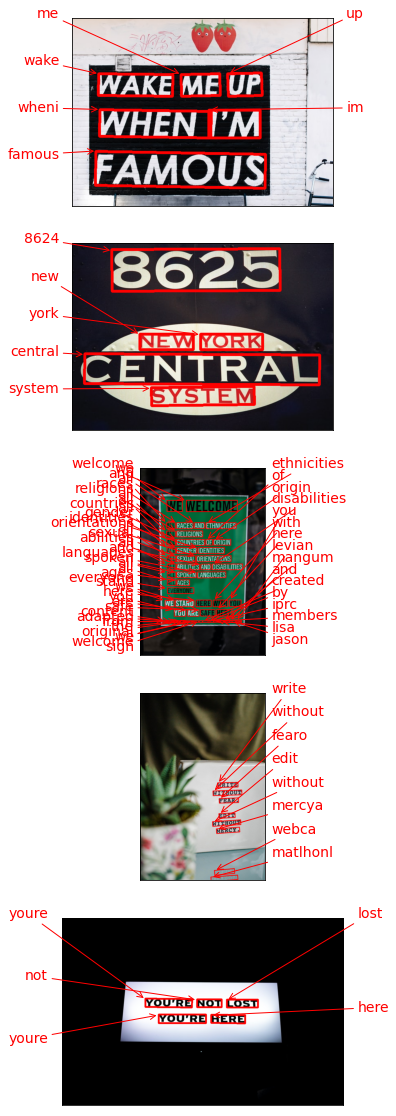

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

(주의사항)
keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델이다. 한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의해 준다.

## 8. 테서랙트 써보기
이번에는 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식해 본다. 테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용되고 있다. 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있다. 

오픈소스라는 점은 여러분들이 원하는 프로젝트에 활용하기 쉽다는 것을 뜻하니, 직접 해 보면서 익혀두면 나중에 간단한 OCR 모델이 필요할 때 빠르게 활용할 수 있을 것이다. 

### 1) 테서랙트 설치하기
클라우드 쉘에서 아래 코드를 사용해 테서랙트 관련 패키지들을 설치해 준다. 

In [9]:
! sudo apt install tesseract-ocr
! sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


### 2) 테서랙트 파이썬 wrapper 설치하기
Pytesseract는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리(wrapper library)이다. 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해준다.
(https://pypi.org/project/pytesseract/)
(https://ko.wikipedia.org/wiki/%EB%9E%98%ED%8D%BC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC)

클라우드 컨테이너에는 이미 설치가 되어 있으니 확인 후 진행해 준다.

In [10]:
! pip list | grep pytesseract

pytesseract                   0.3.7
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


만약 설치가 안 되어 있다면 아래 명령어를 이용해 설치한다.

In [ ]:
! pip install pytesseract

### 3) 테서랙트로 문자 검출하고 이미지 자르기 (detection)
테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있다. 우리는 OCR이 이뤄지는 전체 과정을 직접 거쳐보기 위해 검출을 먼저 해보다. 

In [11]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/표지판.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png


- 위에서 구현한 crop_word_regions() 함수는 여러분이 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수이다.

기본적으로 pytesseract.image_to_data() 를 사용한다. 파이썬에서 편하게 사용하기 위해서 pytesseract 의 Output 을 사용해서 결괏값의 형식을 딕셔너리(DICT) 형식으로 설정해 주게된다. 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 된다. 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 PIL(pillow) 또는 opencv 라이브러리를 사용해 잘라(crop)서 cropped_image_path_list에 담아 리턴하였다. 

(주의) 위 코드에서 lang='kor' 로 바꾸면 에러가 발생한다. 테서랙트의 언어팩을 설치해야 정상 동작하게 된다. 

In [13]:
! sudo apt install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


언어팩 설치 관련해서는 이 페이지를 참고해 주세요.
https://blog.daum.net/rayolla/1141

### 4) 테서랙트로 잘린 이미지에서 단어 인식하기
이제 문자 인식을 해 볼 차례이다. 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나오는 image_to_string()를 사용하게 된다. 

이렇게 인식된 결과가 실제 이미지와 맞는지 확인해 본다. 

In [14]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

(Cneonan

La

=1018

a

eal | @

>.Anseong

te



O10] 018i mi g-sel is

ai >

} |

de bat


AnseongPolicestn


Done


# EXPLORATION_18.프로젝트 : 다양한 OCR모델 비교하기

## Step1. 검증용 데이터셋 준비
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었다. 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 한다.  이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요하다.

### 1-1 이미지 목록 확인

In [16]:
import io
import os
 
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
file_list = os.listdir(img_dir)
file_list

['test20.jpg',
 'test15.jpg',
 'test17.jpg',
 'test16.jpg',
 'test18.jpg',
 'test19.jpg',
 'test12.jpg',
 'test13.jpg',
 'test14.jpg',
 'test11.jpg']

In [17]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [18]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
#ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))
    print()

[test20.jpg]
Texts:

"BAYER
스테로미드 없이
나는 비판텐한다!!
급· 만성 피부염
비판텐' 연고
305
BAYER 30g
"

"BAYER"

"스테"

"로"

"미드"

"없이"

"나는"

"비판"

"텐"

"한다"

"!!"

"급"

"·"

"만성"

"피부염"

"비판"

"텐"

"'"

"연고"

"305"

"BAYER"

"30g"
bounds: (143,451),(143,481),(127,481),(127,451)

[test15.jpg]
Texts:

""다크써클이 매력적이시네요”
Ghana
LOTTE
Dark,
출처: 대홍기획
"

"""

"다크"

"써클"

"이"

"매력적"

"이시네요"

"”"

"Ghana"

"LOTTE"

"Dark,"

"출처"

":"

"대홍"

"기획"
bounds: (976,664),(993,664),(993,682),(976,682)

[test17.jpg]
Texts:

"ADKOR
대한민국광고대상
KOREA ADVERTISING AWARDS
Imagine
your
Korea
#Cheer up the world #Meet you later
Song by LEENALCHI
Dance by AMBIGUOUS DANCE COMPANY
"

"ADKOR"

"대한민국"

"광고"

"대상"

"KOREA"

"ADVERTISING"

"AWARDS"

"Imagine"

"your"

"Korea"

"#Cheer"

"up"

"the"

"world"

"#Meet"

"you"

"later"

"Song"

"by"

"LEENALCHI"

"Dance"

"by"

"AMBIGUOUS"

"DANCE"

"COMPANY"
bounds: (915,537),(972,537),(972,547),(915,547)

[test16.jpg]
Texts:

"ADIOR
'대한민국광고대상
KOREA ADVERTISING AWARDS
신 세 계 적 생 활플랫
SSG
SSG.COM
"

### 1-3  keras-ocr
keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해준다.

필요한 라이브러리인 keras_ocr 과 인식 결과의 시각화를 위한 matplotlib.pyplot 를 불러온다. 
**keras_ocr.pipeline.Pipeline() 는 인식을 위한 파이프라인을 생성**하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 된다. 검출기와 인식기를 위한 가중치 하나씩을 불러오게된다. 
keras_ocr 공식문서 : https://keras-ocr.readthedocs.io/en/latest/index.html

In [20]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


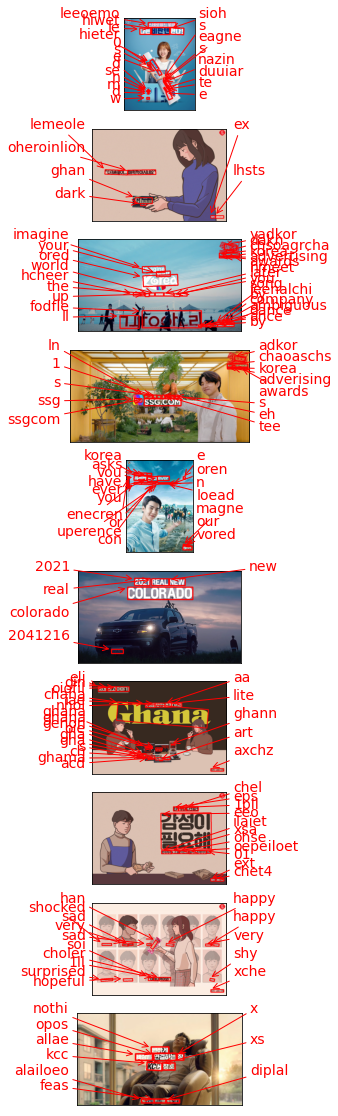

In [21]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 1-4 tesseract

In [22]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
img_file_path = work_dir + '/test15.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png


In [27]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
img_file_path = work_dir + '/test14.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png
/aiffel/aiffel/ocr_python/test/0012.png
/aiffel/aiffel/ocr_python/test/0013.png
/aiffel/aiffel/ocr_python/test/0014.png
/aiffel/aiffel/ocr_python/test/0015.png
/aiffel/aiffel/ocr_python/test/0016.png
/aiffel/aiffel/ocr_python/test/0017.png
/aiffel/aiffel/ocr_python/test/0018.png
/aiffel/aiffel/ocr_python/test/0019.png
/aiffel/aiffel/ocr_python/test/0020.png
/aiffel/aiffel/ocr_python/test/0021.png
/aiffel/aiffel/ocr_python/test/0022.png


### 테서랙트로 잘린 이미지에서 단어 인식하기

In [28]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

D


,

;

3



Ly

—

ZG.

Oper

s

*~

Opry

surprised | hopeful

surprised

hopeful


—_— ————— ————


=

PH}=

|=!

Done


## Step 3. 테스트 결과 분석
- 글씨만 출력해서 나온 결과를 살펴보았을 때 Google OCR API이 다른 것에 비해서 문자 인식률이 좋았다. 포스터나 표지판에 있는 영어 또는 한글, 숫자까지도 잘 인식이 되었다.
- keras-ocr의 경우에 문자인식은 잘 되었으나 영어로만 읽히고 한글로는 표시가 되지는 않아서 아쉬웠다. 
- tesseract도 역시 하직 한글까지는 인식이 되지 않았다. 한글은 인식이 잘 되 않아서 인식이 잘 안되는 것 처럼 느꼈다. 
- 아직까지는 구글이 제일 잘 되고 실생활에서도 쓸것같다.

## 회고
- OCR모델에 따라서 문자인식의 수준이 달라진다는 것을 확인할 수 있었다.
- 어디까지 인식되는지, 어느정도의 크기까지 인식되는지 확인해 보아도 좋을 거 같다. 